# Seattle Housing Market - EDA Project





### Customer
Client: **Thomas Hansen**: Buyer, 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?

### Plan for Thomas Hansen:
* Find least priced properties
* sort by grade and renovation
* Sort by size, bedrooms at least 3, 2 bathrooms
* Check neighborhood: safe, social, good schools (use internet)

### Hypothesis
* Property grade and renovations correlates with price (check mean of grade and price)
* proximity to city center correlates with price
* season affects listing prices
* properties that have been sold and bought a lot are faulty
* the higher the squarefeet and bedroom/bathroom number, the higher the price



# Data

### Explanation of columns

|Variable|Description|
|---|---|
|id| Identification|
date| Date sold|
price| Sale price|
bedrooms| Number of bedrooms|
bathrooms| Number of bathrooms|
sqft_liv | Size of living area in square feet|
sqft_lot| Size of the lot in square feet|
floors| Number of floors|
waterfront| ‘1’ if the property has a waterfront, ‘0’ if not.|
view| An index from 0 to 4 of how good the view of the property was|
condition| Condition of the house, ranked from 1 to 5|
grade| Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings |of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty|
sqft_above| Square feet above ground|
sqft_basmt| Square feet below ground|
yr_built| Year built|
yr_renov| Year renovated. ‘0’ if never renovated|
zipcode| 5 digit zip code|
lat | Latitude|
long| Longitude|
squft_liv15| Average size of interior housing living space for the closest 15 houses, in square feet|
squft_lot15 | Average size of land lots for the closest 15 houses, in square feet|
Shape_leng| Polygon length in meters|
Shape_Area| Polygon area in meters|


## Getting Started: Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [1]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [3]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [4]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [5]:
cur.execute("set schema 'eda'")
cur.execute('SELECT * FROM eda.king_county_house_sales LIMIT 10')
cur.fetchall()

[(datetime.date(2014, 10, 13), 221900.0, 7129300520, 1),
 (datetime.date(2014, 12, 9), 538000.0, 6414100192, 2),
 (datetime.date(2015, 2, 25), 180000.0, 5631500400, 3),
 (datetime.date(2014, 12, 9), 604000.0, 2487200875, 4),
 (datetime.date(2015, 2, 18), 510000.0, 1954400510, 5),
 (datetime.date(2014, 5, 12), 1230000.0, 7237550310, 6),
 (datetime.date(2014, 6, 27), 257500.0, 1321400060, 7),
 (datetime.date(2015, 1, 15), 291850.0, 2008000270, 8),
 (datetime.date(2015, 4, 15), 229500.0, 2414600126, 9),
 (datetime.date(2015, 3, 12), 323000.0, 3793500160, 10)]

In [6]:
cur.execute('SELECT * FROM eda.king_county_house_details LIMIT 10')
cur.fetchall()

[(1000102,
  6.0,
  3.0,
  2400.0,
  9373.0,
  2.0,
  None,
  0.0,
  3,
  7,
  2400.0,
  0.0,
  1991,
  0,
  98002,
  47.3262,
  -122.214,
  2060.0,
  7316.0),
 (100100050,
  3.0,
  1.0,
  1320.0,
  11090.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  1320.0,
  0.0,
  1955,
  0,
  98155,
  47.7748,
  -122.304,
  1320.0,
  8319.0),
 (1001200035,
  3.0,
  1.0,
  1350.0,
  7973.0,
  1.5,
  None,
  0.0,
  3,
  7,
  1350.0,
  0.0,
  1954,
  0,
  98188,
  47.4323,
  -122.292,
  1310.0,
  7491.0),
 (1001200050,
  4.0,
  1.5,
  1260.0,
  7248.0,
  1.5,
  None,
  0.0,
  5,
  7,
  1260.0,
  0.0,
  1955,
  None,
  98188,
  47.433,
  -122.292,
  1300.0,
  7732.0),
 (1003000175,
  3.0,
  1.0,
  980.0,
  7606.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  980.0,
  0.0,
  1954,
  0,
  98188,
  47.4356,
  -122.29,
  980.0,
  8125.0),
 (100300280,
  3.0,
  2.25,
  1430.0,
  4777.0,
  2.0,
  0.0,
  0.0,
  3,
  7,
  1430.0,
  0.0,
  2010,
  0,
  98059,
  47.4867,
  -122.152,
  1639.0,
  3854.0),
 (100300500,
  3.0,
  2.5,
  1

With `conn.close()` you can close the connection again.

In [7]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [8]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [9]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sales = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_3650/2432274850.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query_string, conn)


In [10]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
df_details = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_3650/3255438784.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_details = pd.read_sql(query_string, conn)


In [11]:
query_string = "SELECT *FROM eda.king_county_house_sales kchs LEFT JOIN eda.king_county_house_details kchd ON kchs.house_id = kchd.id ORDER BY kchd.id;"
df_sales_details = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_3650/2443254326.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_details = pd.read_sql(query_string, conn)


In [12]:
#close the connection
conn.close()

In [13]:
df_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [14]:
df_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0


In [15]:
#export the data to a csv-file
df_sales.to_csv('data/eda_sales.csv',index=False)
df_details.to_csv('data/eda_details.csv',index=False)
df_sales_details.to_csv('data/eda.csv',index=False)

In [16]:
df_sales_details.head()

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


## Data Cleaning

In [17]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

In [18]:
#saving data into dataframe
df_house = pd.read_csv("data/eda.csv")

df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


In [19]:
#exploring data
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [20]:
# import missingno
import missingno as msno


In [21]:
# display number of missing values per column
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

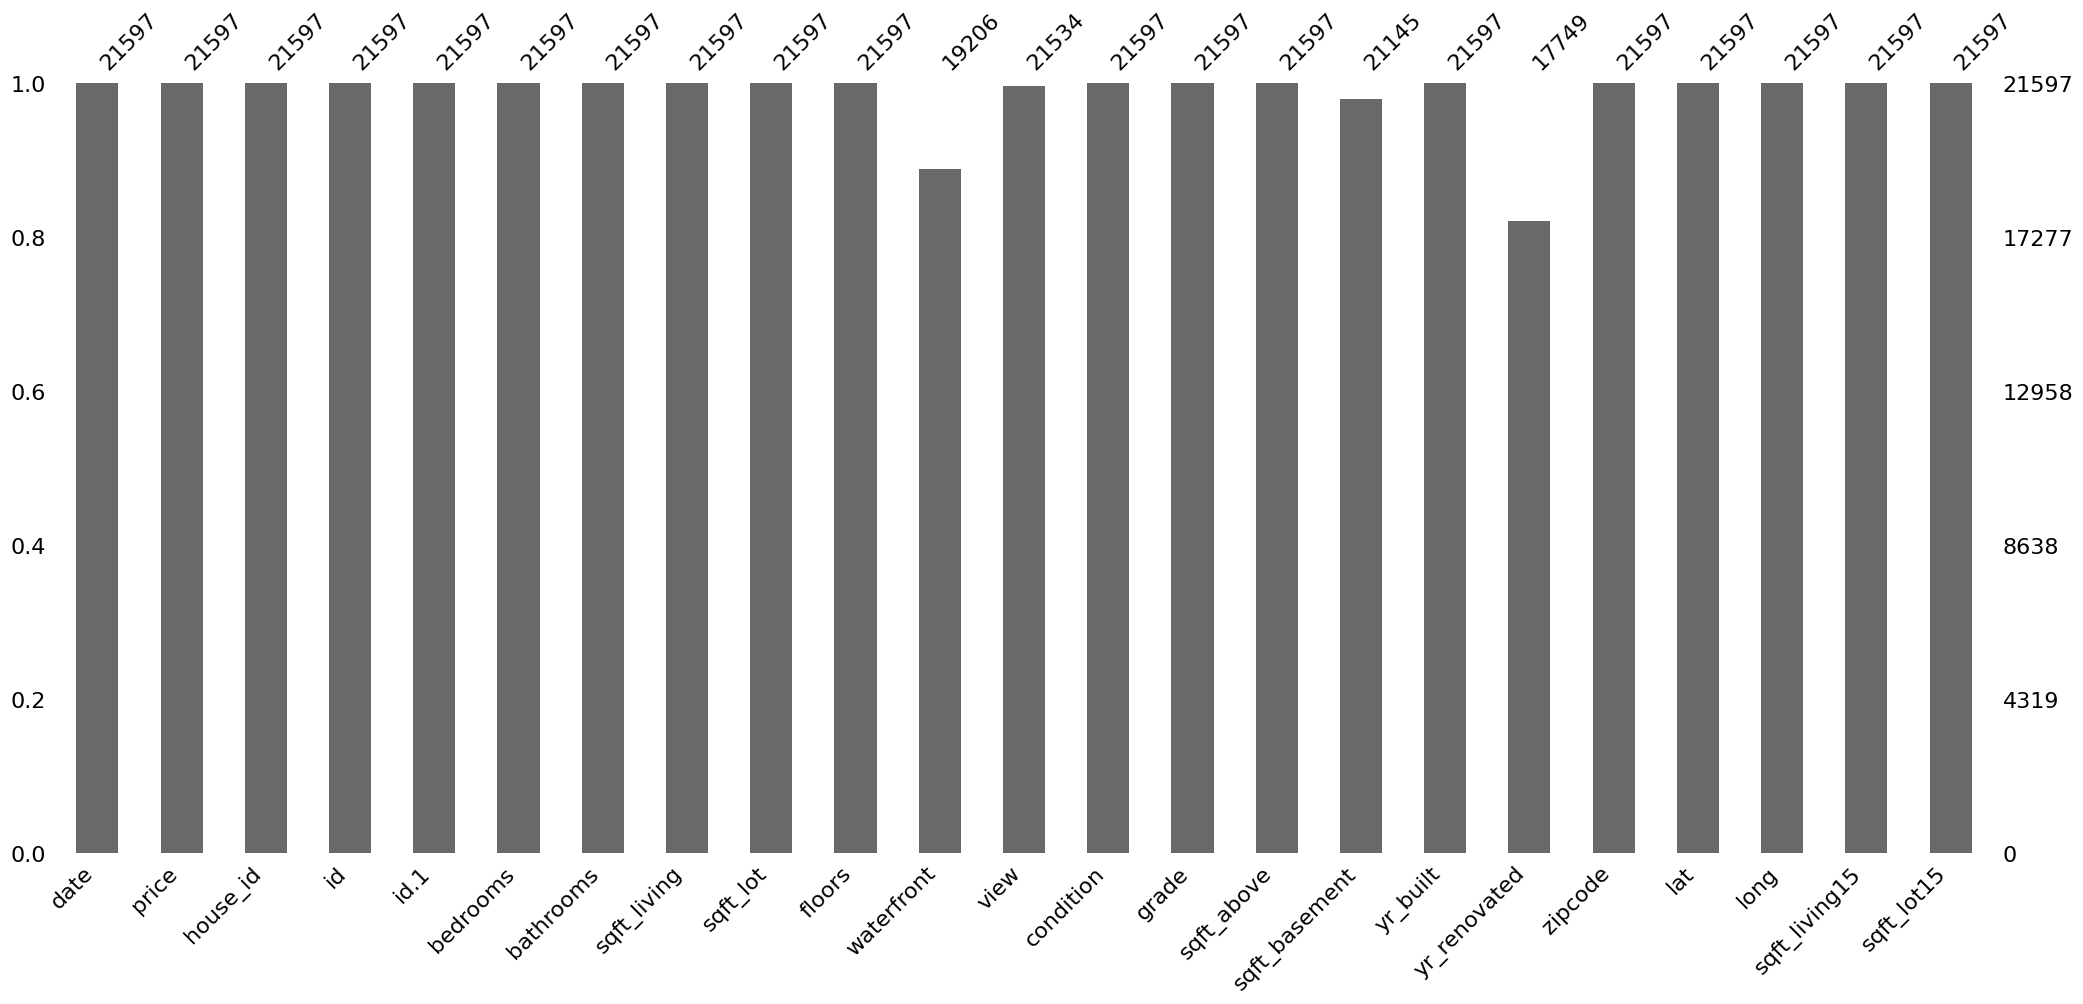

In [22]:
# plotting percentage of missing values per column
msno.bar(df_house)

<Axes: >

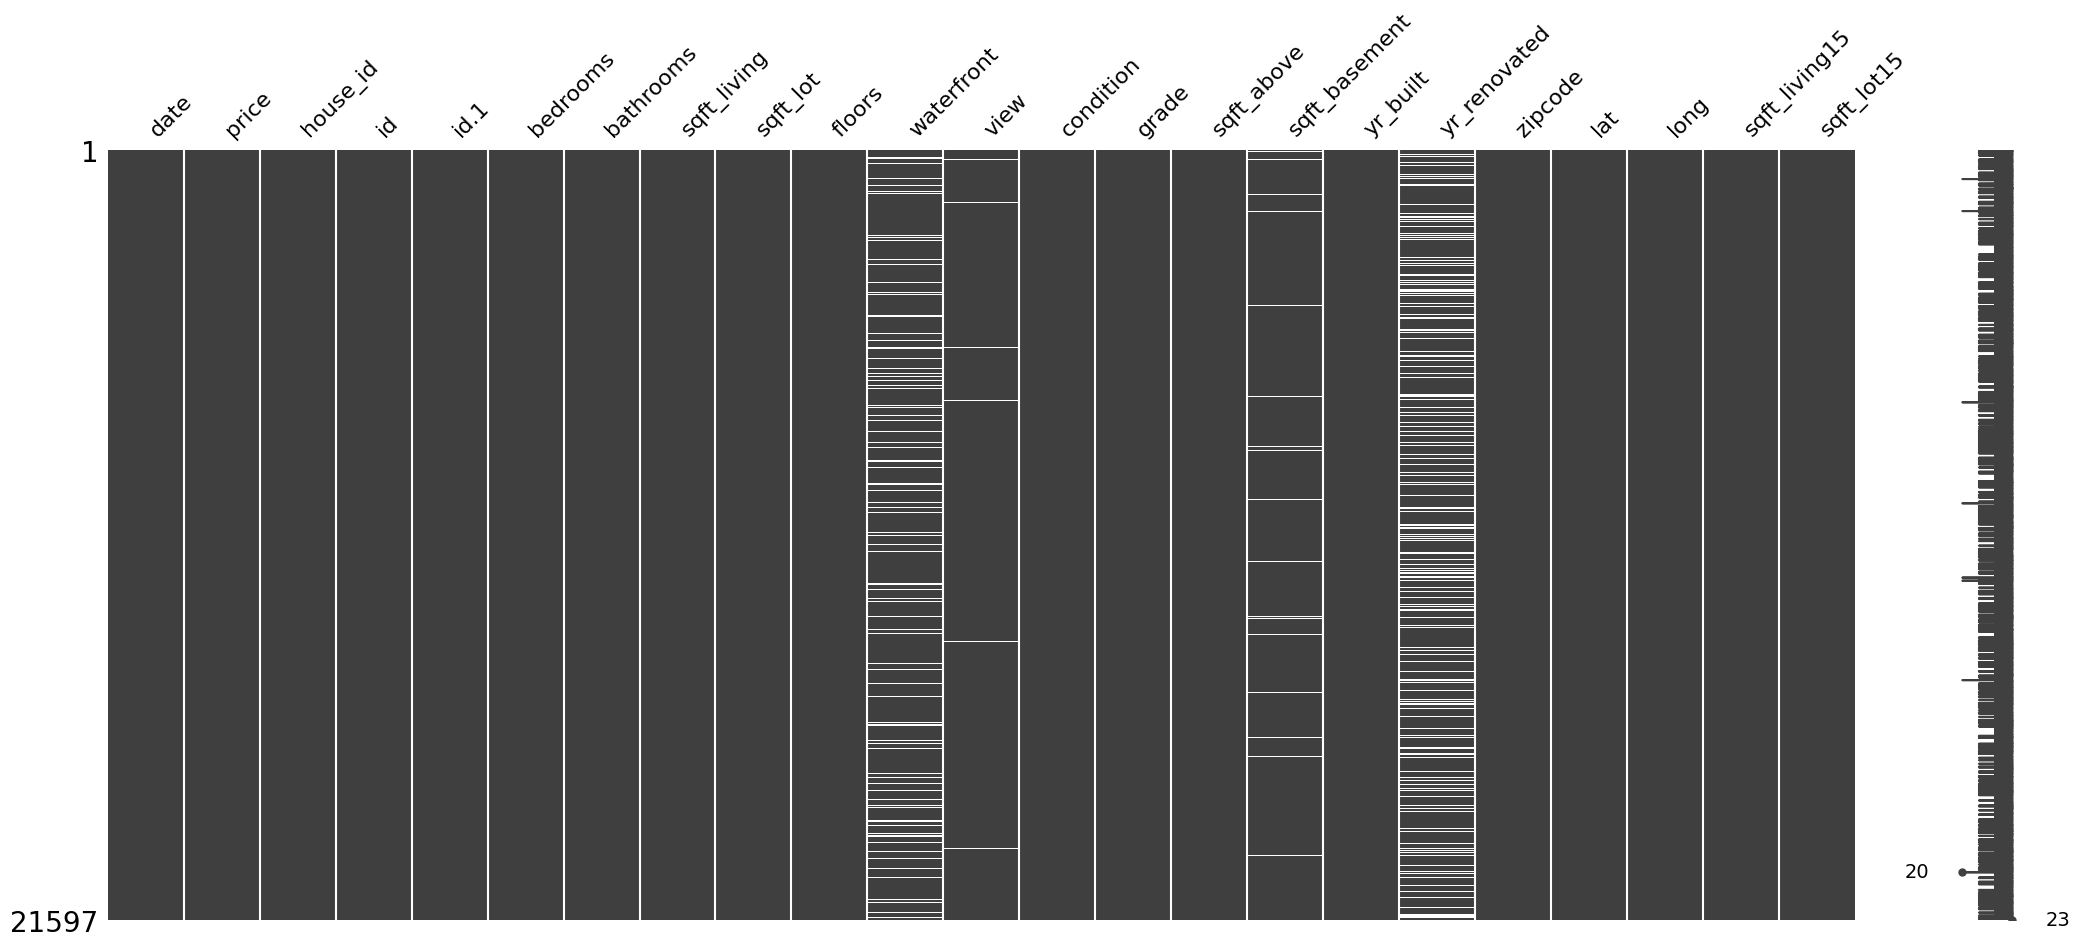

In [23]:
msno.matrix(df_house)

In [24]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
df_house.columns = df_house.columns.str.replace('.','_')
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
# renaming column
df_house = df_house.rename({'lat':'latitude','long':'longitude',
                            'sqft_living15':'living_space_15_neighbours', 'sqft_lot15':'plotsize_15_neighbours',
                            'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft'}, axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'latitude', 'longitude',
       'living_space_15_neighbours', 'plotsize_15_neighbours'],
      dtype='object')

In [27]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [28]:
df_house.dtypes

date                           object
price                         float64
house_id                        int64
id                              int64
id_1                            int64
bedrooms                      float64
bathrooms                     float64
livingspace_sqft              float64
plotsize_sqft                 float64
floors                        float64
waterfront                    float64
view                          float64
condition                       int64
grade                           int64
sqft_above                    float64
sqft_basement                 float64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
latitude                      float64
longitude                     float64
living_space_15_neighbours    float64
plotsize_15_neighbours        float64
dtype: object

In [29]:
# Convert date to datetime format 
df_house.date = pd.to_datetime(df_house.date)
print(df_house['date'])

0       2015-04-22
1       2014-09-16
2       2014-05-08
3       2014-08-11
4       2015-04-01
           ...    
21592   2014-07-25
21593   2015-03-11
21594   2014-06-24
21595   2014-07-03
21596   2014-10-30
Name: date, Length: 21597, dtype: datetime64[ns]


In [30]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


In [31]:
# fix missing values in Waterfront column



# use fillna to impute missing values
df_house["waterfront"] = df_house.waterfront.fillna(0)

# Replace missing values in "sqft_basement" with values from "sqft_living"
df_house['sqft_basement'].fillna(df_house['livingspace_sqft'], inplace=True)

# turn yr_renovated into year datetim
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated)

df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970-01-01,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970-01-01,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,1970-01-01,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,1970-01-01,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970-01-01,98168,47.4783,-122.265,1290.0,10320.0


<Axes: >

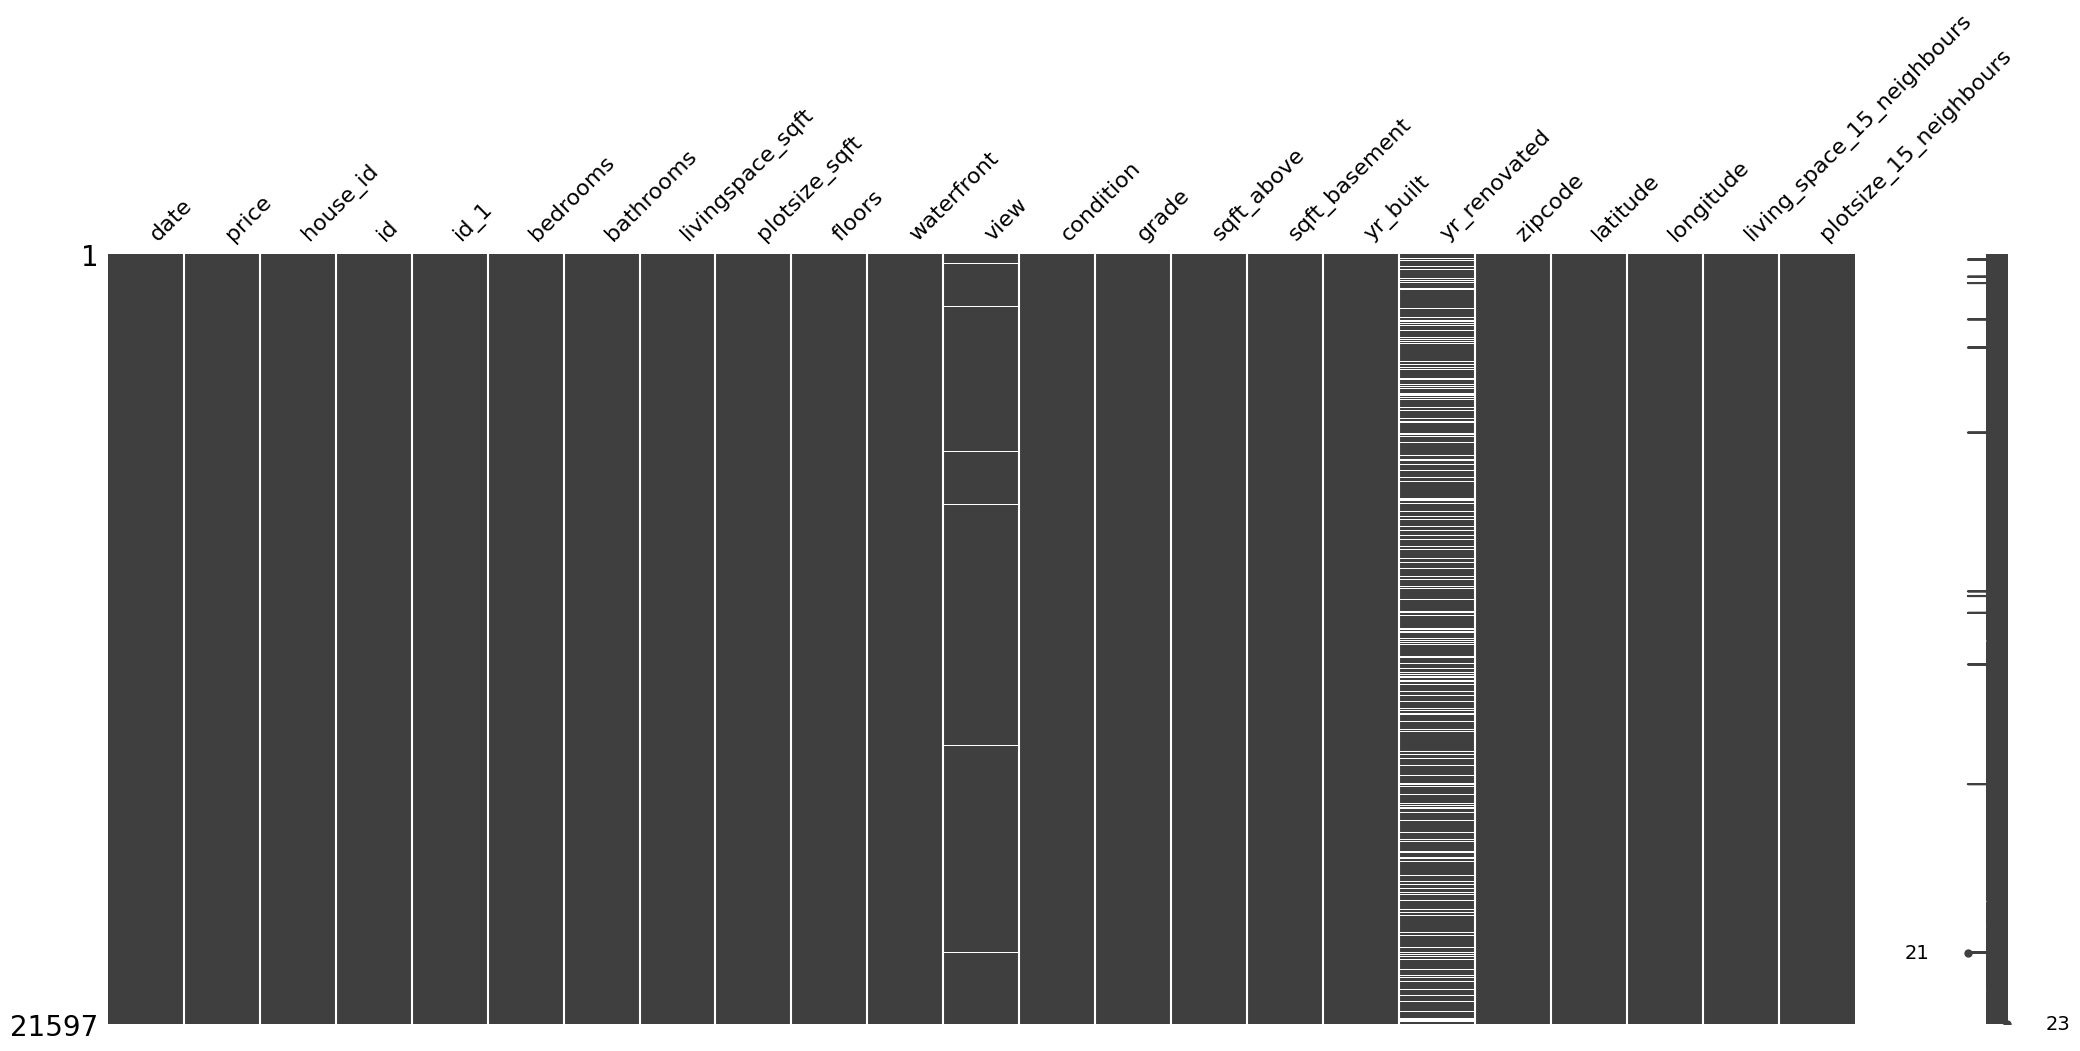

In [32]:
msno.matrix(df_house)

In [33]:
#round bathroom number
df_house['bathrooms'] = df_house.bathrooms.round()

In [34]:
# turn yr_built and yr_renovated into year datetime
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated).dt.strftime('%Y')

#first turn yr_built into float
#df_house = df_house.astype({'yr_built': float})
df_house['yr_built'] = df_house['yr_built'].astype(str).apply(lambda x: x.replace('.0',''))

df_house['yr_built'] = pd.to_datetime(df_house.yr_built).dt.strftime('%Y')

df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,2.0,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,1970,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.0,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,1970,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0


<Axes: >

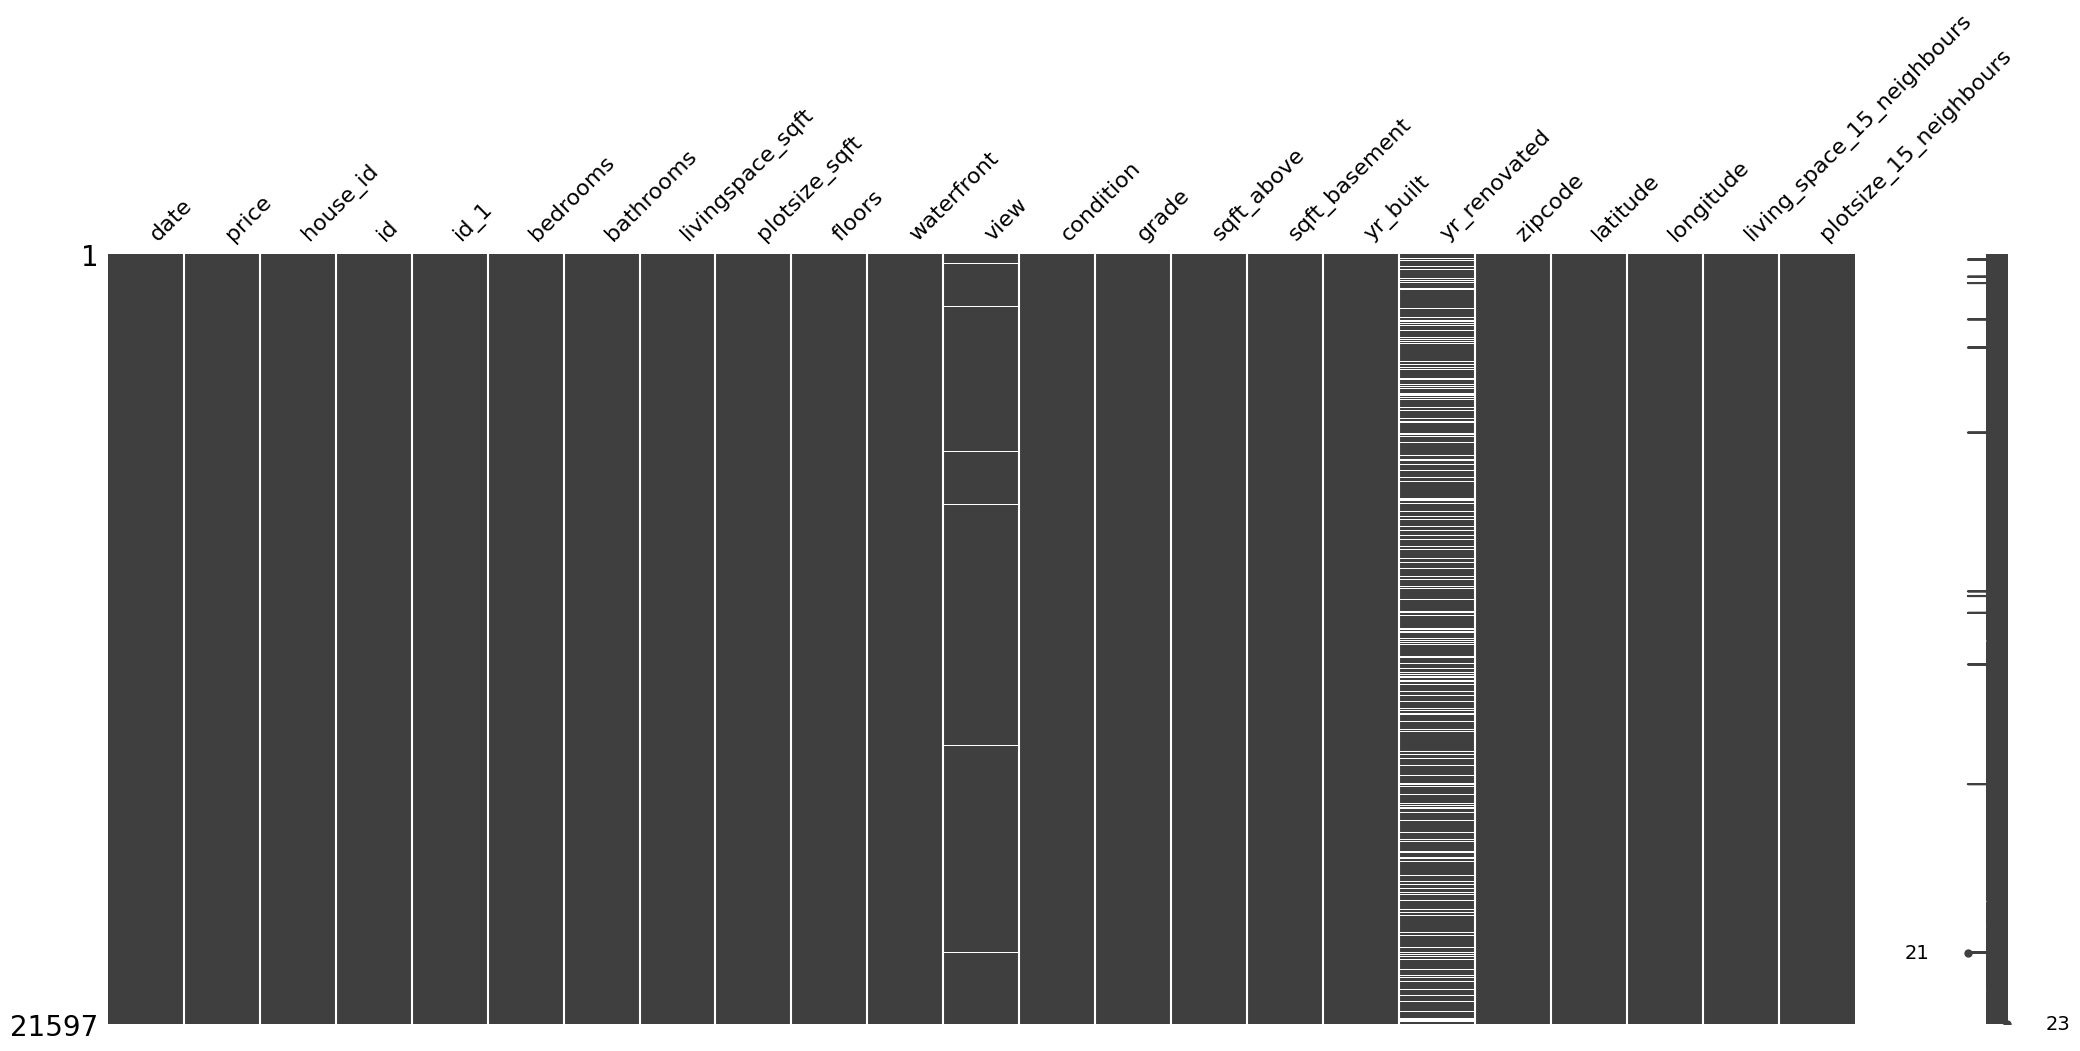

In [35]:
msno.matrix(df_house)

In [36]:
# use fillna to impute missing values of yr renovated
df_house["yr_renovated"] = df_house.yr_renovated.fillna(0)

In [37]:
#fix missing values in potential buyers
df_house["view"] = df_house.view.fillna(0)

<Axes: >

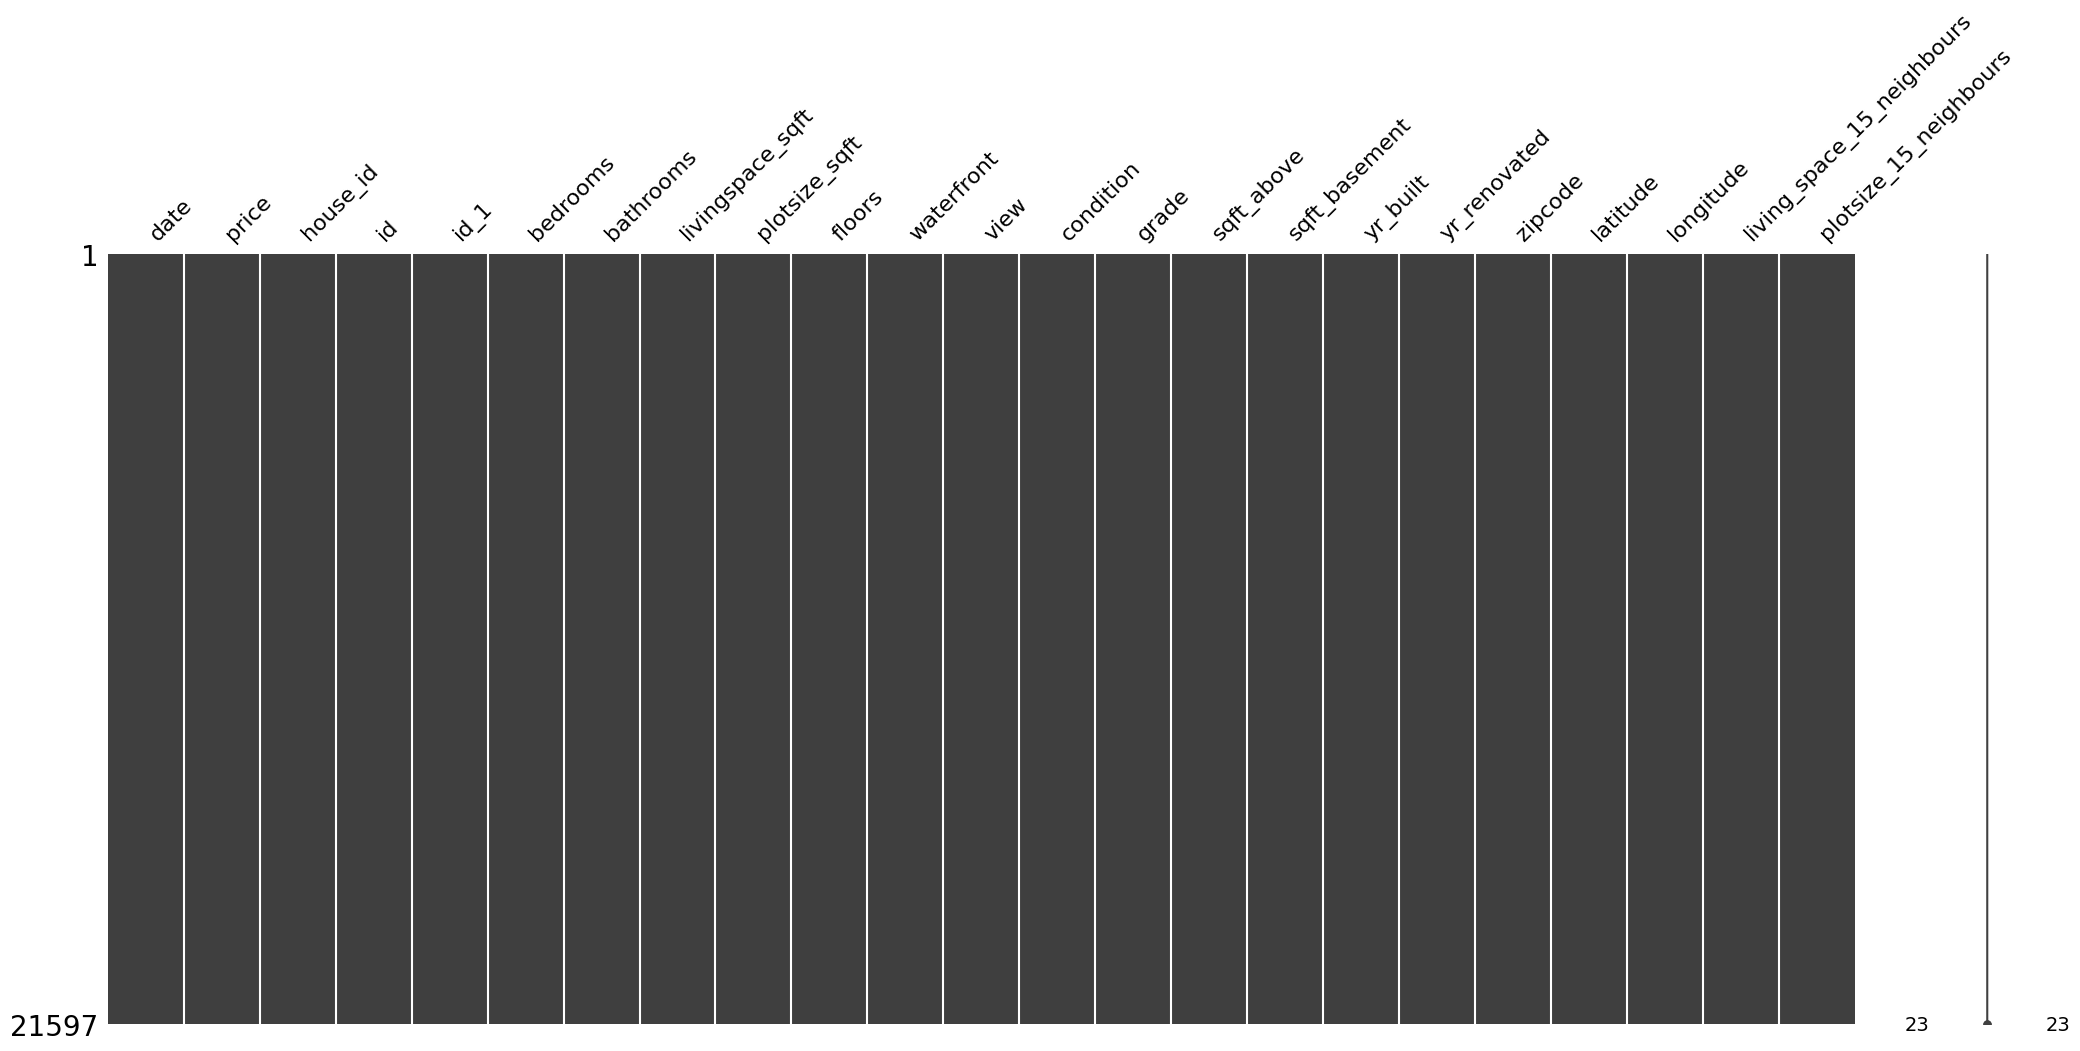

In [38]:
msno.matrix(df_house)

In [39]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        21597 non-null  datetime64[ns]
 1   price                       21597 non-null  float64       
 2   house_id                    21597 non-null  int64         
 3   id                          21597 non-null  int64         
 4   id_1                        21597 non-null  int64         
 5   bedrooms                    21597 non-null  float64       
 6   bathrooms                   21597 non-null  float64       
 7   livingspace_sqft            21597 non-null  float64       
 8   plotsize_sqft               21597 non-null  float64       
 9   floors                      21597 non-null  float64       
 10  waterfront                  21597 non-null  float64       
 11  view                        21597 non-null  float64   

# Data Exploration and Visualization

Text(0, 0.5, 'Prices')

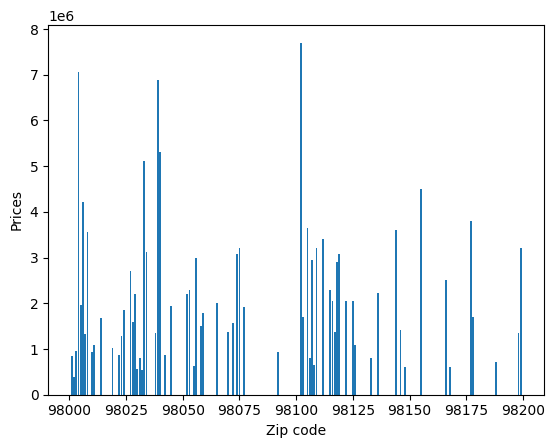

In [40]:
plt.bar(df_house.zipcode,df_house.price)
plt.xlabel('Zip code')
plt.ylabel('Prices')

In [41]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

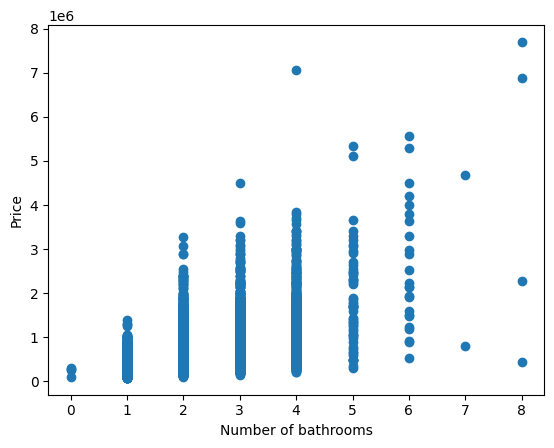

In [42]:
plt.scatter(df_house.bathrooms, df_house.price)
plt.ylabel('Price')
plt.xlabel('Number of bathrooms')
plt.show

Text(0.5, 0, 'grade')

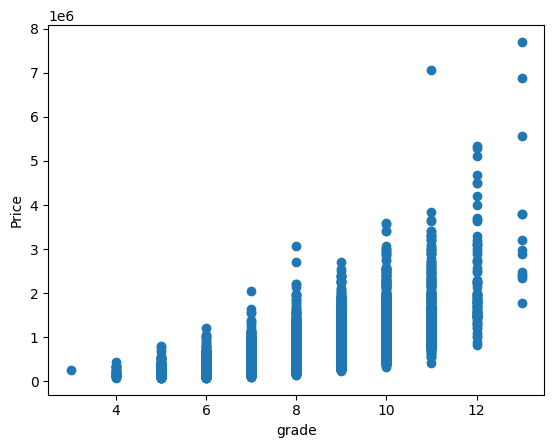

In [43]:
plt.scatter(df_house.grade, df_house.price)
plt.ylabel('Price')
plt.xlabel('grade')


In [44]:
df_house['grade'].describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

TypeError: 'value' must be an instance of str or bytes, not a int

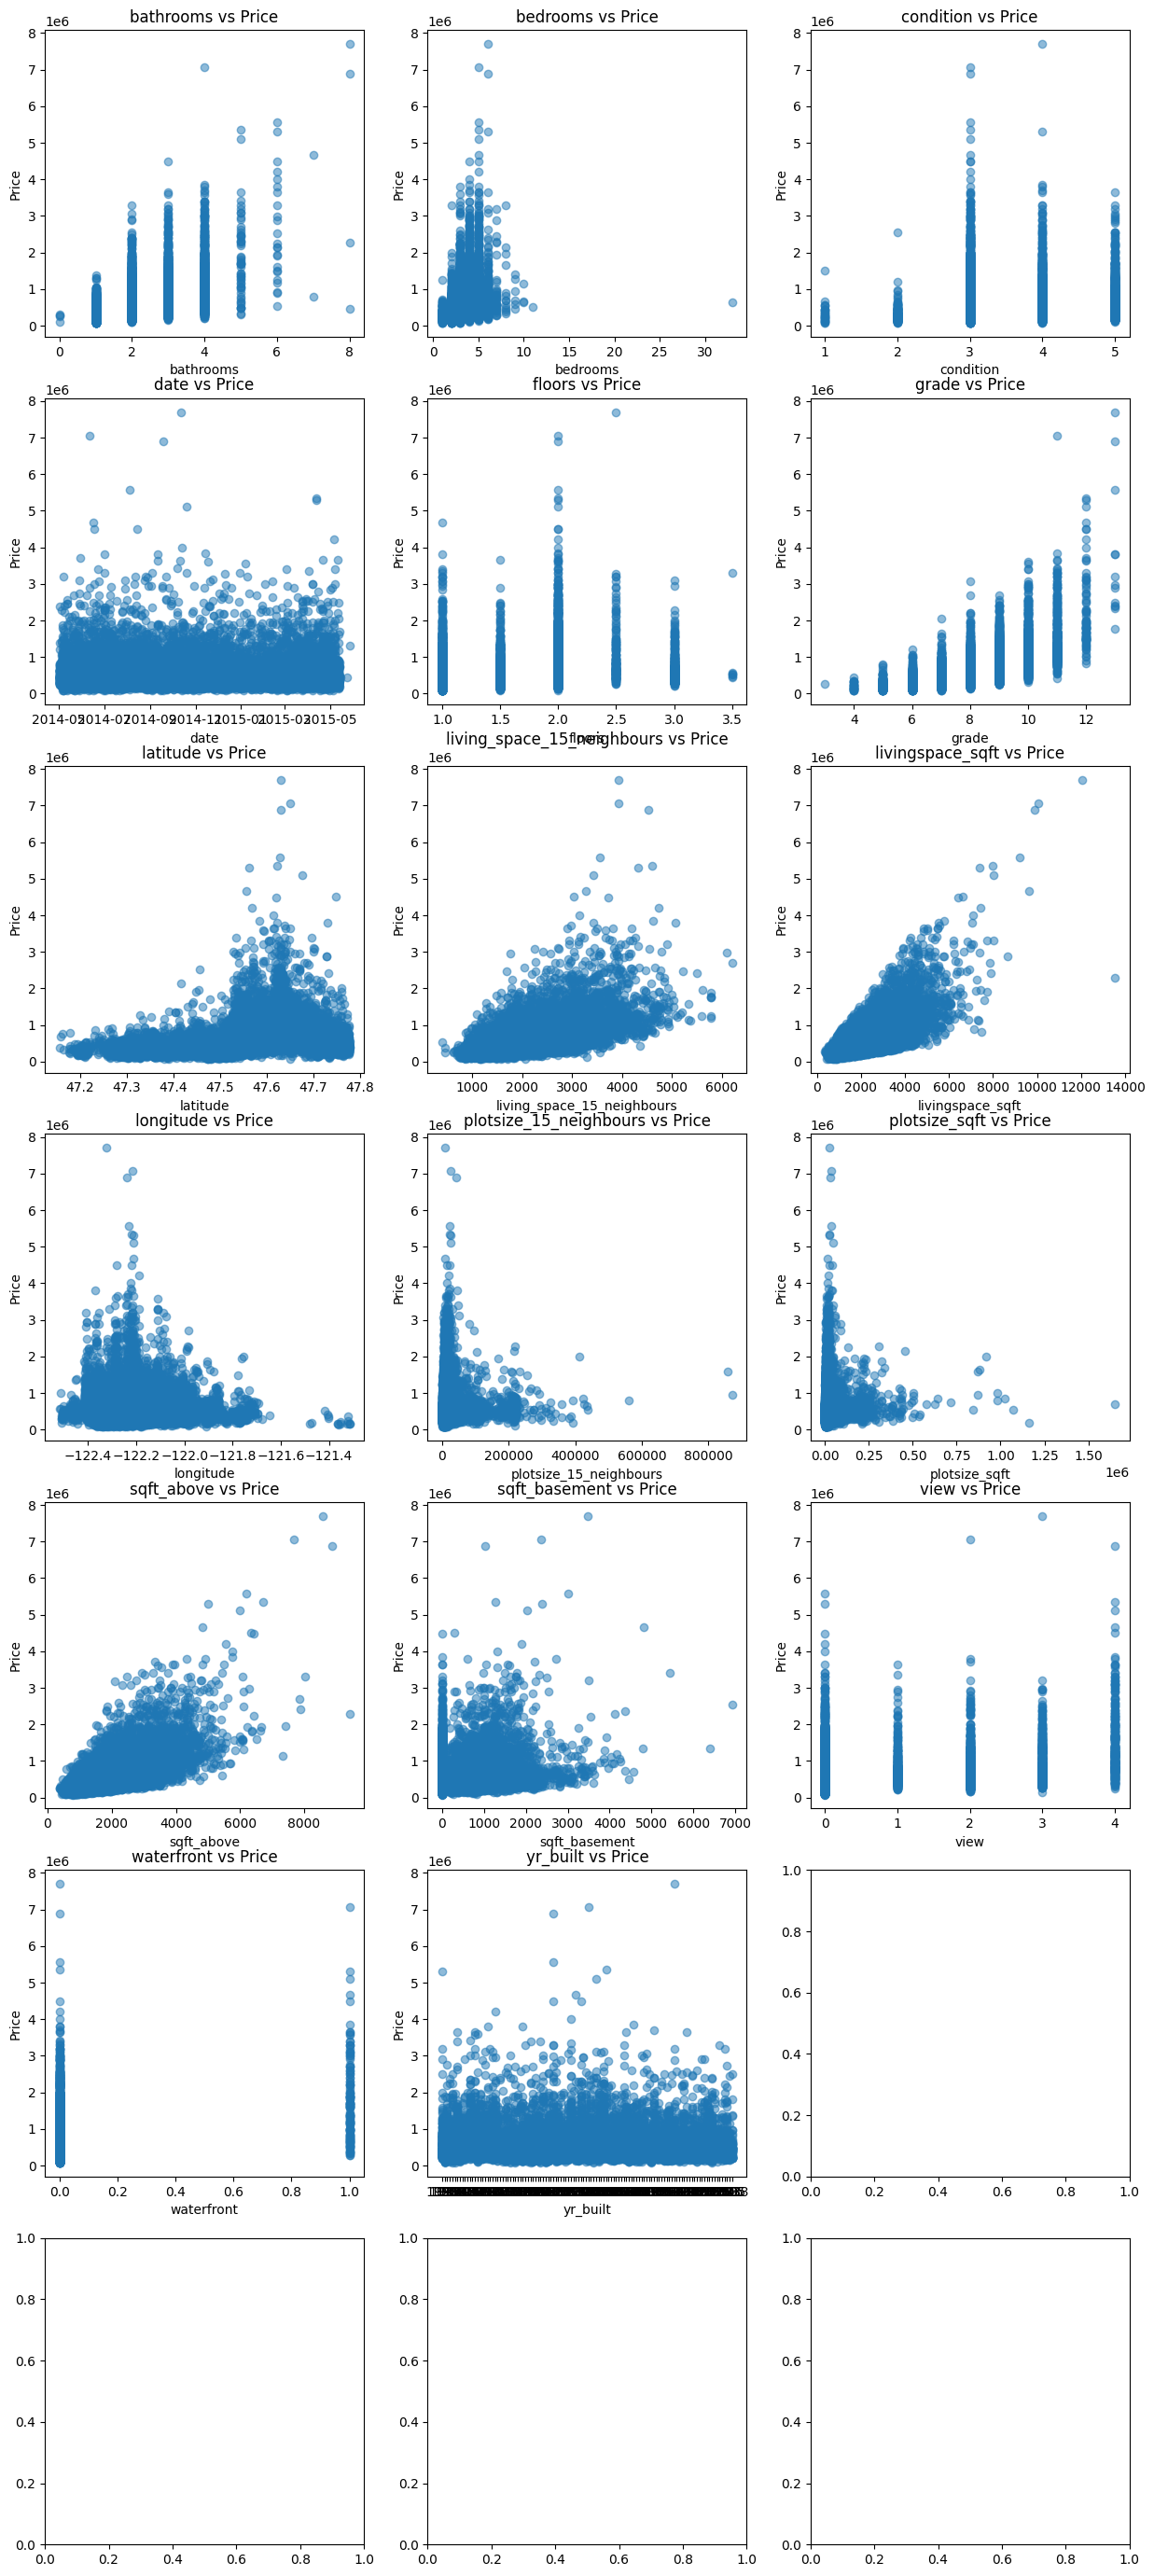

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns excluding 'price'
x_columns = df_house.columns.difference(['price','house_id','id','id_1'])

# Calculate the number of rows and columns for the subplots
num_plots = len(x_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot scatter plots for each column against 'price'
for i, col in enumerate(x_columns):
    ax = axes[i]
    ax.scatter(df_house[col], df_house['price'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f'{col} vs Price')

# Remove any unused subplots
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [46]:
df_house

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,2.0,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,1970,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.0,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,1970,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-07-25,365000.0,9842300095,16724,9842300095,5.0,2.0,1600.0,4168.0,1.5,...,7,1600.0,0.0,1927,1970,98126,47.5297,-122.381,1190.0,4168.0
21593,2015-03-11,380000.0,9842300485,3258,9842300485,2.0,1.0,1040.0,7372.0,1.0,...,7,840.0,200.0,1939,1970,98126,47.5285,-122.378,1930.0,5150.0
21594,2014-06-24,339000.0,9842300540,7615,9842300540,3.0,1.0,1100.0,4128.0,1.0,...,7,720.0,380.0,1942,0,98126,47.5296,-122.379,1510.0,4538.0
21595,2014-07-03,399900.0,9895000040,20964,9895000040,2.0,2.0,1410.0,1005.0,1.5,...,9,900.0,510.0,2011,1970,98027,47.5446,-122.018,1440.0,1188.0


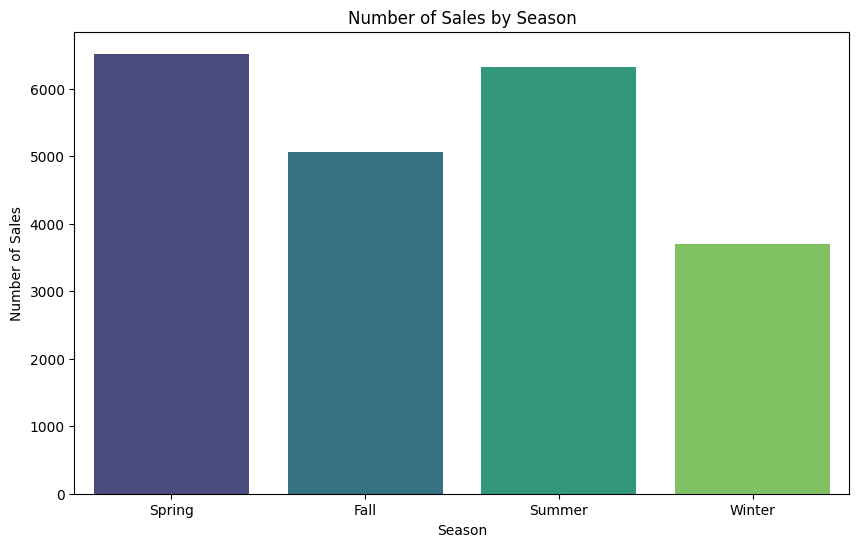

In [85]:
# Timing for Buying
# Extract the month from the date
df_house['month'] = df_house['date'].dt.month

# Create a mapping for months to seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df_house['season'] = df_house['month'].map(season_mapping)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df_house, palette='viridis')
plt.title('Number of Sales by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sales')
plt.show()


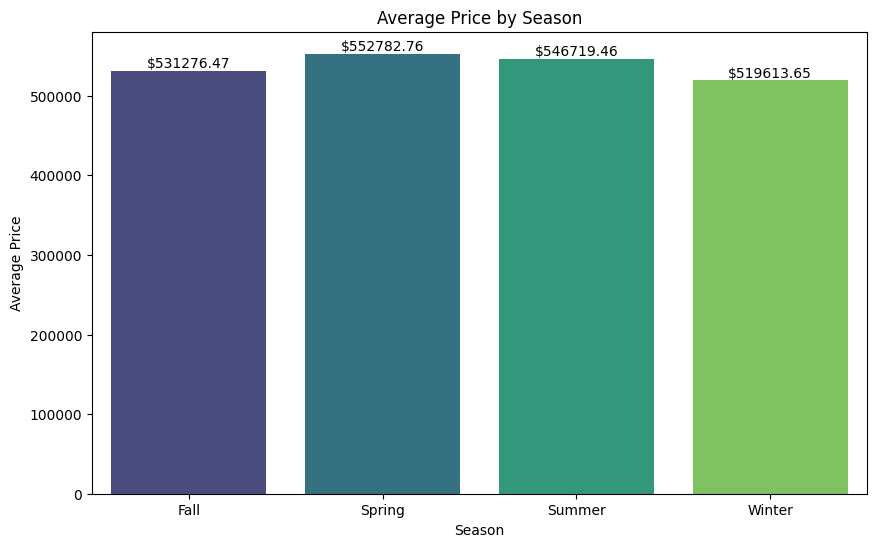

In [102]:
# Calculate the average price for each season
season_avg_price = df_house.groupby('season')['price'].mean()

# Create a bar plot with average prices for each season
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=season_avg_price.index, y=season_avg_price.values, palette='viridis')
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

# Annotate each bar with the average price value
for i, value in enumerate(season_avg_price.values):
    ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()



In [ ]:
# Filter data for properties in safe and social neighborhoods: find social, good neighbourhoods with good infrastructure
safe_neighborhoods = [zipcode1, zipcode2, ...]  # List of zip codes
filtered_neighborhoods = df_house[
    df_house['zipcode'].isin(safe_neighborhoods)
]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', hue='yr_renovated', data=filtered_neighborhoods, palette='coolwarm')
plt.title('Price vs. Grade for Unrenovated Properties in Safe Neighborhoods')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend(title='Renovated')
plt.show()


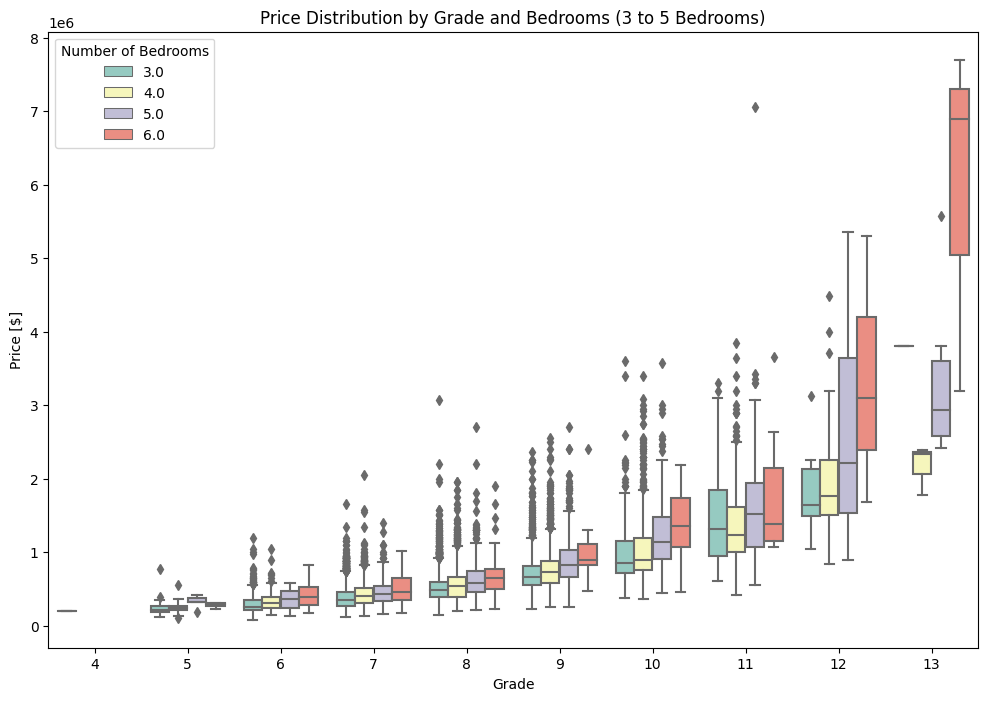

In [89]:
#3. Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house[
    (df_house['bedrooms'] >= 3) & (df_house['bedrooms'] <= 6)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 5 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()



In [77]:
# create new dataframe with houses in lower 25% range of prices

df_house_25 = df_house[df_house['price'] <= df_house['price'].quantile(0.25)].copy()

df_house_25

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,1970,98002,47.3262,-122.214,2060.0,7316.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,7,1990.0,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0
9,2014-11-12,281000.0,6200017,4330,6200017,3.0,1.0,1340.0,21336.0,1.5,...,5,1340.0,0.0,1945,1970,98032,47.4023,-122.273,1340.0,37703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,2014-08-28,300000.0,9835800320,11318,9835800320,4.0,2.0,2080.0,8750.0,1.0,...,8,1330.0,750.0,1967,0,98032,47.3749,-122.291,1790.0,8750.0
21580,2014-12-03,247000.0,9835800750,4418,9835800750,3.0,2.0,1640.0,7630.0,1.0,...,8,1180.0,460.0,1968,0,98032,47.3739,-122.290,1930.0,7630.0
21581,2015-02-04,215000.0,9835800840,5409,9835800840,4.0,2.0,1470.0,7000.0,1.0,...,8,1470.0,0.0,1967,1970,98032,47.3742,-122.289,1640.0,7000.0
21582,2014-06-25,245700.0,9835801000,11251,9835801000,3.0,2.0,1640.0,8400.0,1.0,...,8,1180.0,460.0,1968,1970,98032,47.3733,-122.289,1600.0,8120.0


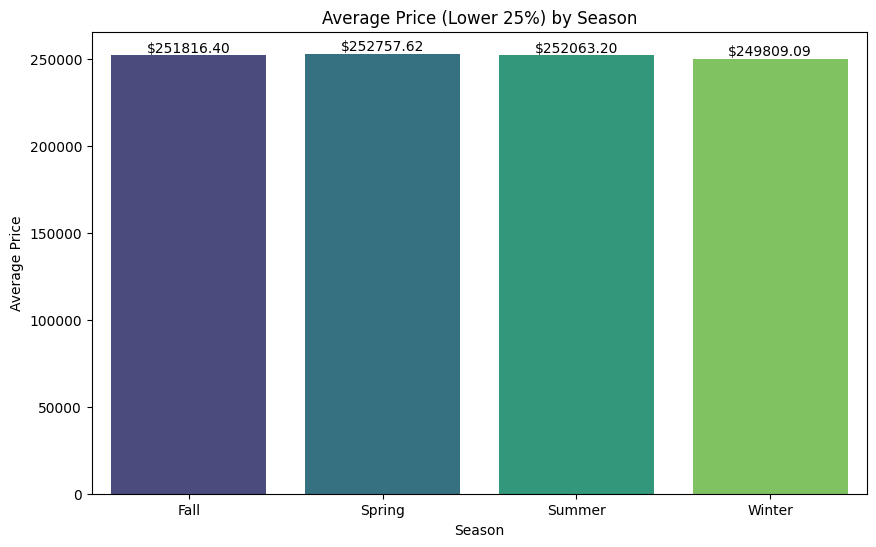

In [103]:
# Calculate the 25th percentile price
lower_25_price = df_house['price'].quantile(0.25)

# Filter data for houses within the lower 25% of prices
lower_25_houses = df_house[df_house['price'] <= lower_25_price]

# Calculate the average price for each season within the lower 25% subset
lower_25_season_avg_price = lower_25_houses.groupby('season')['price'].mean()

# Create a bar plot with average prices for each season (lower 25% houses)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lower_25_season_avg_price.index, y=lower_25_season_avg_price.values, palette='viridis')
plt.title('Average Price (Lower 25%) by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

# Annotate each bar with the average price value
for i, value in enumerate(lower_25_season_avg_price.values):
    ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()

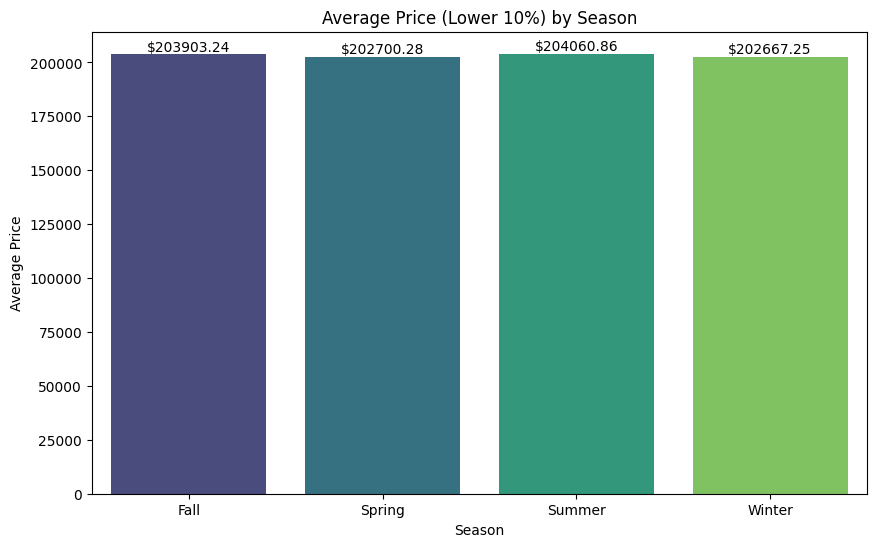

In [105]:
# Calculate the 10th percentile price
lower_10_price = df_house['price'].quantile(0.10)

# Filter data for houses within the lower 10% of prices
lower_10_houses = df_house[df_house['price'] <= lower_10_price]

# Calculate the average price for each season within the lower 10% subset
lower_10_season_avg_price = lower_10_houses.groupby('season')['price'].mean()

# Create a bar plot with average prices for each season (lower 10% houses)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lower_10_season_avg_price.index, y=lower_10_season_avg_price.values, palette='viridis')
plt.title('Average Price (Lower 10%) by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

# Annotate each bar with the average price value
for i, value in enumerate(lower_10_season_avg_price.values):
    ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_3650/1624472515.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_bedrooms = df_house_25[


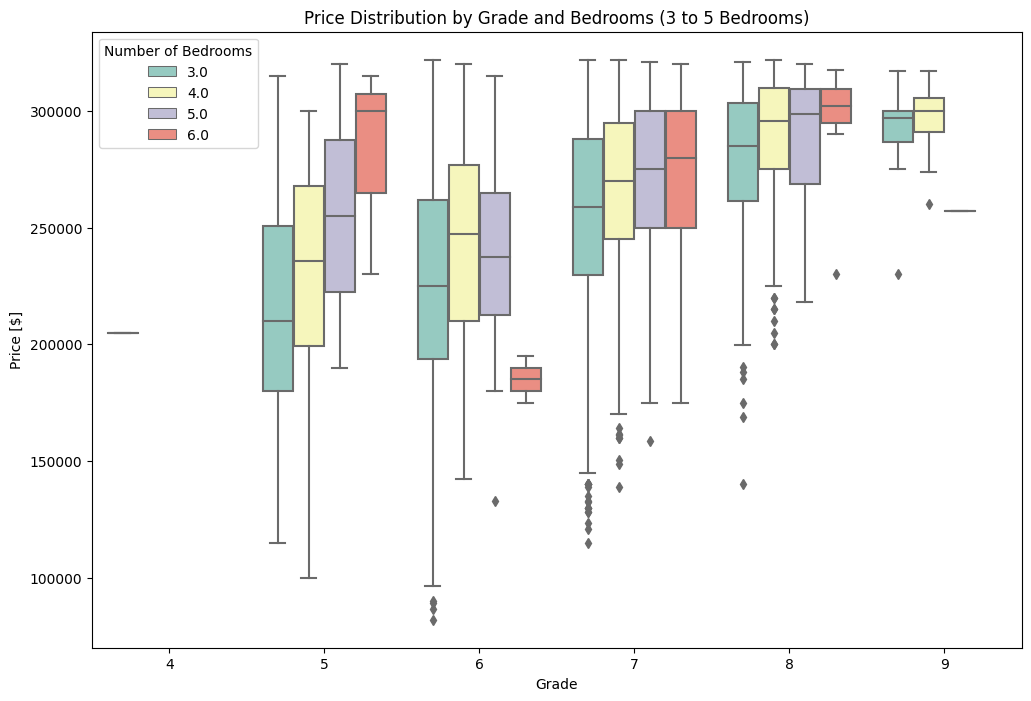

         house_id  bedrooms  bathrooms  grade     price  zipcode
3439   1443500305       6.0        2.0      6  194990.0    98118
12736  5132000140       6.0        1.0      6  175000.0    98106


In [120]:
#3. Same plot, smaller dataframe: Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house_25[
    (df_house_25['bedrooms'] >= 3) & (df_house['bedrooms'] <= 6)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 5 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()

# Display the properties that correspond to the data points in the box plot
selected_properties = filtered_bedrooms[
    (filtered_bedrooms['grade'] == 6) & (filtered_bedrooms['bedrooms'] == 6)
]
print(selected_properties[['house_id', 'bedrooms', 'bathrooms', 'grade', 'price', 'zipcode']])


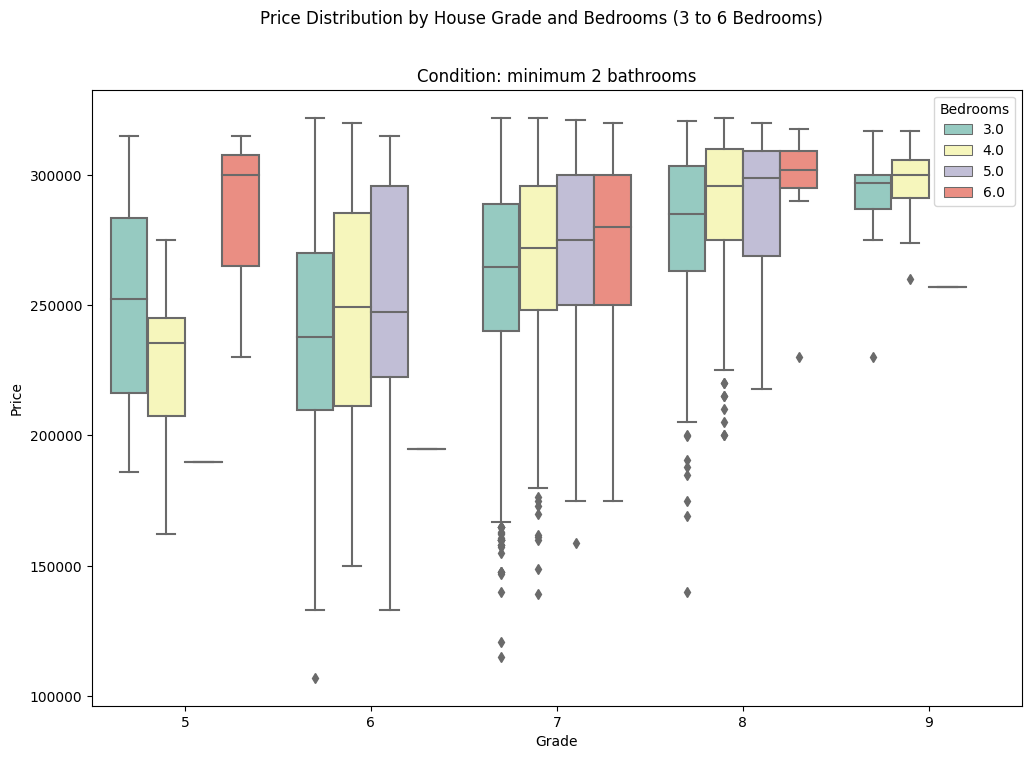

         house_id     price  bedrooms  bathrooms  grade  zipcode
892     421000285  268000.0       4.0        2.0      5    98056
8989   3340401555  235000.0       4.0        2.0      5    98055
15926  7227501170  235867.0       4.0        2.0      5    98056
15929  7227501450  240000.0       4.0        2.0      5    98056
15938  7227800055  199500.0       4.0        2.0      5    98056
15939  7227800055  247000.0       4.0        2.0      5    98056
15940  7227800065  199000.0       4.0        2.0      5    98056
15944  7227801580  232000.0       4.0        2.0      5    98056
15946  7227801630  275000.0       4.0        2.0      5    98056
15947  7227801955  162000.0       4.0        2.0      5    98056


In [117]:
#lets do the same with bathrooms and bedrooms
# Filter data for properties with 3 to 5 bedrooms and at least 2 bathrooms
filtered_properties = df_house_25[
    (df_house_25['bedrooms'] >= 3) & (df_house_25['bedrooms'] <= 6) & (df_house_25['bathrooms'] >= 2)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_properties, palette='Set3')
plt.title ('Condition: minimum 2 bathrooms')
plt.suptitle('Price Distribution by House Grade and Bedrooms (3 to 6 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

# Display the properties that correspond to the data points in the box plot
selected_properties = filtered_properties[
    (filtered_properties['grade'] == 5) & (filtered_properties['bedrooms'] == 4)
]
print(selected_properties[['house_id', 'price', 'bedrooms', 'bathrooms', 'grade', 'zipcode']])


In [92]:
# create new dataframe with houses in lower 15% range of prices

df_house_15 = df_house[df_house['price'] <= df_house['price'].quantile(0.15)].copy()

df_house_15

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,1.5,...,420.0,1930,1970,98168,47.4783,-122.265,1290.0,10320.0,4,Spring
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0,2,Winter
10,2014-11-04,239000.0,7200080,16702,7200080,4.0,2.0,1980.0,10585.0,1.5,...,0.0,1924,1970,98055,47.4836,-122.214,1360.0,7810.0,11,Fall
11,2014-10-16,150000.0,7200179,16801,7200179,2.0,1.0,840.0,12750.0,1.0,...,0.0,1925,0,98055,47.4840,-122.211,1480.0,6969.0,10,Fall
12,2015-04-24,175000.0,7200179,16802,7200179,2.0,1.0,840.0,12750.0,1.0,...,0.0,1925,0,98055,47.4840,-122.211,1480.0,6969.0,4,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21471,2014-06-27,260000.0,9828200460,6340,9828200460,2.0,1.0,700.0,4800.0,1.0,...,0.0,1922,1970,98122,47.6147,-122.300,1440.0,4800.0,6,Summer
21580,2014-12-03,247000.0,9835800750,4418,9835800750,3.0,2.0,1640.0,7630.0,1.0,...,460.0,1968,0,98032,47.3739,-122.290,1930.0,7630.0,12,Winter
21581,2015-02-04,215000.0,9835800840,5409,9835800840,4.0,2.0,1470.0,7000.0,1.0,...,0.0,1967,1970,98032,47.3742,-122.289,1640.0,7000.0,2,Winter
21582,2014-06-25,245700.0,9835801000,11251,9835801000,3.0,2.0,1640.0,8400.0,1.0,...,460.0,1968,1970,98032,47.3733,-122.289,1600.0,8120.0,6,Summer


/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_3650/4035454603.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_bedrooms = df_house_15[


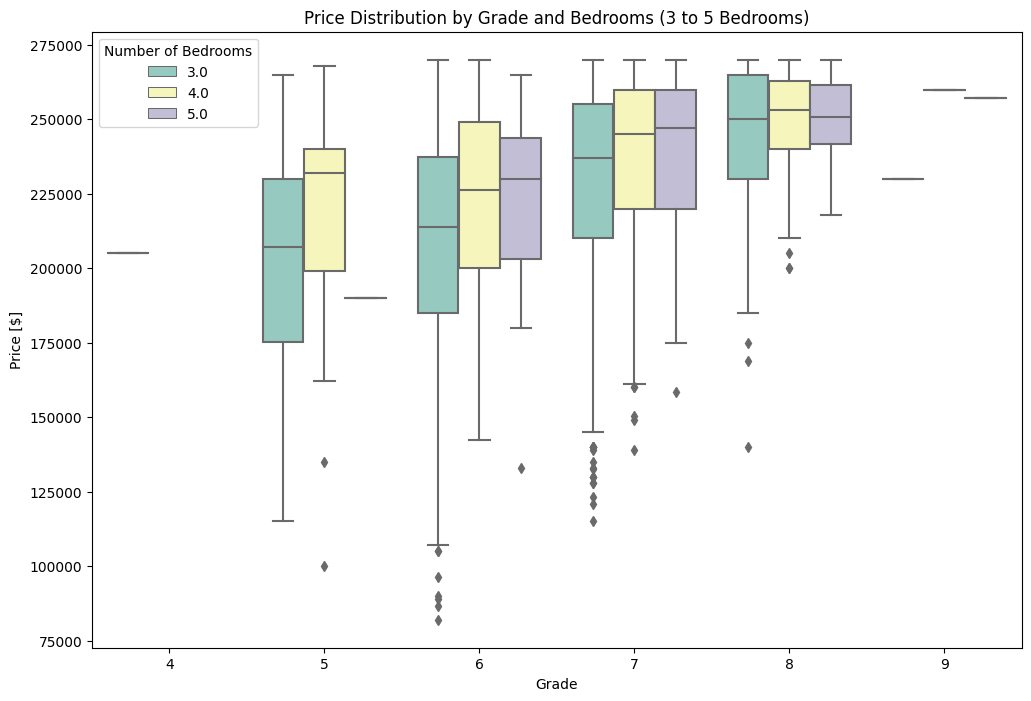

         house_id  bedrooms  grade     price
10        7200080       4.0      6  239000.0
44       16000545       4.0      6  250000.0
71       42000245       4.0      6  171000.0
225     123039333       4.0      6  240000.0
268     126059021       4.0      6  200000.0
...           ...       ...    ...       ...
19325  8699100160       4.0      6  250000.0
19637  8856004400       4.0      6  235000.0
19878  8945000260       4.0      6  209950.0
20926  9476200485       4.0      6  261490.0
21021  9500900430       4.0      6  265000.0

[90 rows x 4 columns]


In [108]:
#3. Same plot, smaller dataframe: Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house_15[
    (df_house_15['bedrooms'] >= 3) & (df_house['bedrooms'] <= 5)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 5 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()

# Display the properties that correspond to the data points in the box plot
selected_properties = filtered_bedrooms[
    (filtered_bedrooms['grade'] == 6) & (filtered_bedrooms['bedrooms'] == 4)
]
print(selected_properties[['house_id', 'bedrooms', 'grade', 'price']])

In [78]:
#sort by bedroom number, bathroom number and grade 


filtered_houses = df_house_15[
    (df_house_15['bedrooms'] >= 3) &
    (df_house_15['bathrooms'] >= 2) &
    (df_house_15['grade'] > 3)
].copy()
filtered_houses



,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,7,1990.0,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0
10,2014-11-04,239000.0,7200080,16702,7200080,4.0,2.0,1980.0,10585.0,1.5,...,6,1980.0,0.0,1924,1970,98055,47.4836,-122.214,1360.0,7810.0
34,2014-05-09,254000.0,11900140,1199,11900140,3.0,2.0,1850.0,4597.0,2.0,...,8,1850.0,0.0,2003,1970,98042,47.3755,-122.136,2210.0,5000.0
37,2014-09-02,207000.0,13001991,15545,13001991,3.0,2.0,1520.0,2550.0,2.0,...,7,1520.0,0.0,2005,1970,98108,47.5245,-122.330,1460.0,2550.0
40,2015-04-17,219950.0,16000015,3013,16000015,3.0,2.0,1070.0,6601.0,1.0,...,6,1070.0,0.0,1985,1970,98002,47.3115,-122.209,1030.0,6614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21273,2015-04-27,182500.0,9543000945,9329,9543000945,3.0,2.0,1830.0,4744.0,2.0,...,7,1830.0,0.0,1997,1970,98001,47.2734,-122.248,1670.0,8001.0
21376,2014-07-30,265000.0,9558200025,2925,9558200025,3.0,2.0,1380.0,8536.0,2.0,...,7,1380.0,0.0,1955,0,98148,47.4374,-122.335,1260.0,8750.0
21580,2014-12-03,247000.0,9835800750,4418,9835800750,3.0,2.0,1640.0,7630.0,1.0,...,8,1180.0,460.0,1968,0,98032,47.3739,-122.290,1930.0,7630.0
21581,2015-02-04,215000.0,9835800840,5409,9835800840,4.0,2.0,1470.0,7000.0,1.0,...,8,1470.0,0.0,1967,1970,98032,47.3742,-122.289,1640.0,7000.0


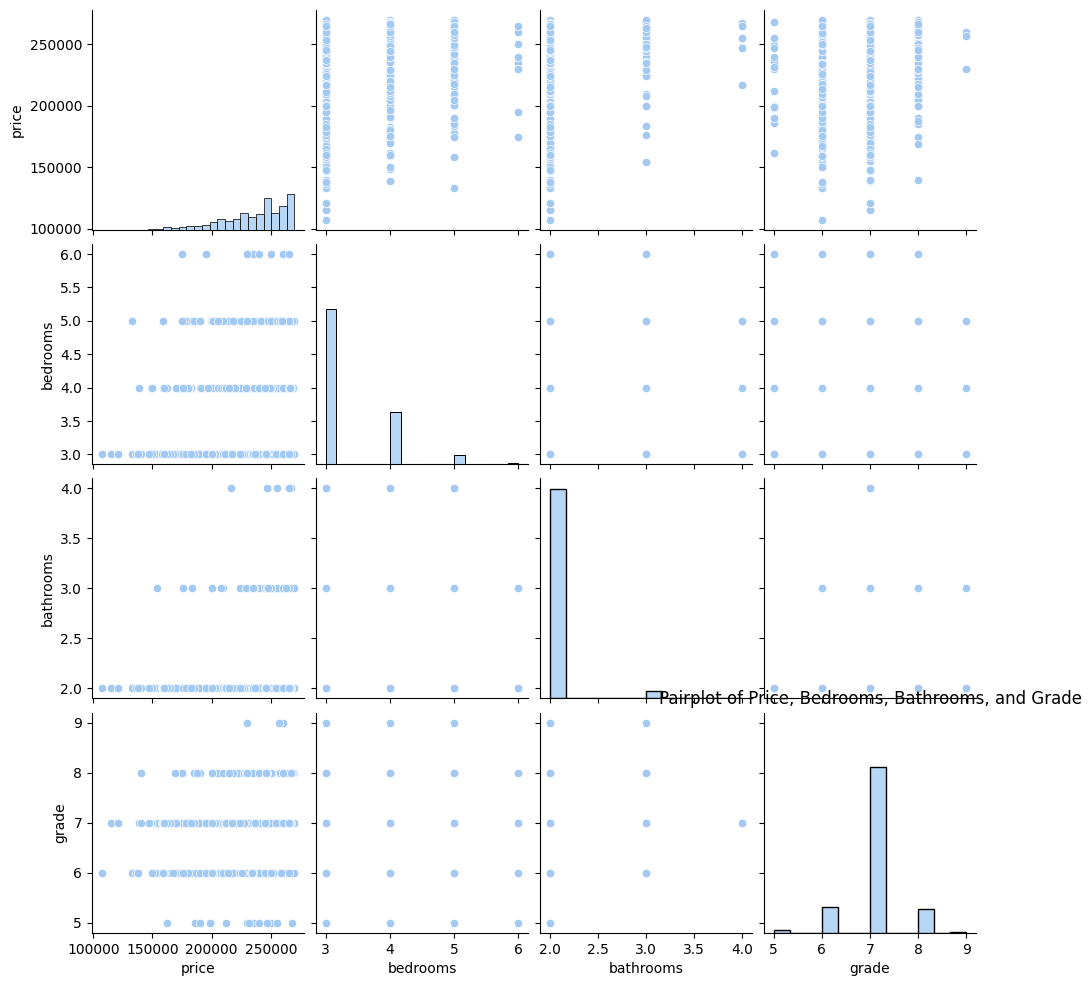

In [79]:
# Pairplot to visualize relationships
sns.pairplot(filtered_houses[['price', 'bedrooms', 'bathrooms', 'grade']])
plt.title("Pairplot of Price, Bedrooms, Bathrooms, and Grade")
plt.show()

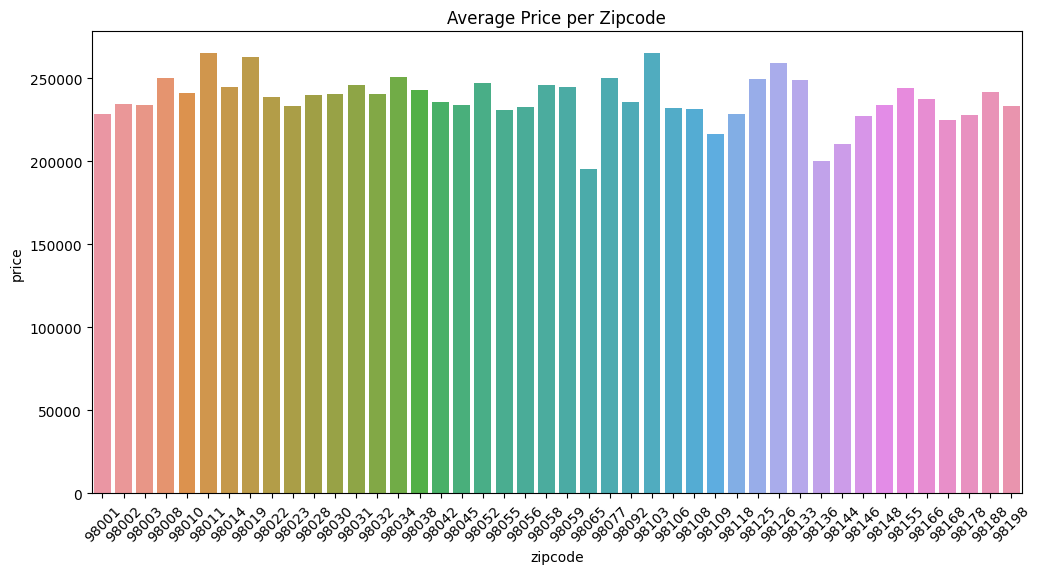

In [80]:
# Bar plot to visualize average price per zipcode
avg_price_by_zip = filtered_houses.groupby('zipcode')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_zip, x='zipcode', y='price')
plt.title("Average Price per Zipcode")
plt.xticks(rotation=45)
plt.show()

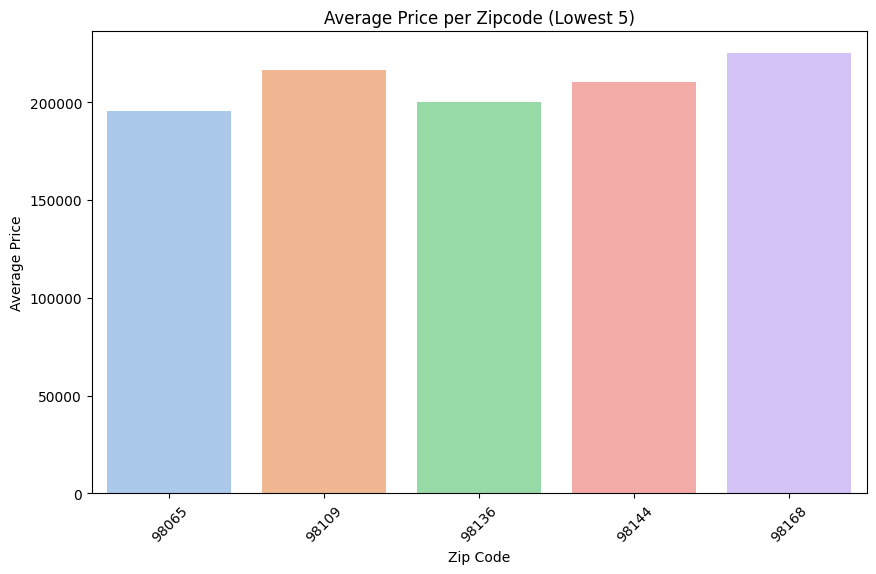

In [81]:
sns.set_palette("pastel")

# Calculate average price per zipcode
avg_price_by_zip = filtered_houses.groupby('zipcode')['price'].mean().reset_index()

# Filter for the 5 zip codes with the lowest average prices
lowest_price_zips = avg_price_by_zip.nsmallest(5, 'price')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_price_zips, x='zipcode', y='price')
plt.title("Average Price per Zipcode (Lowest 5)")
plt.xlabel("Zip Code")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

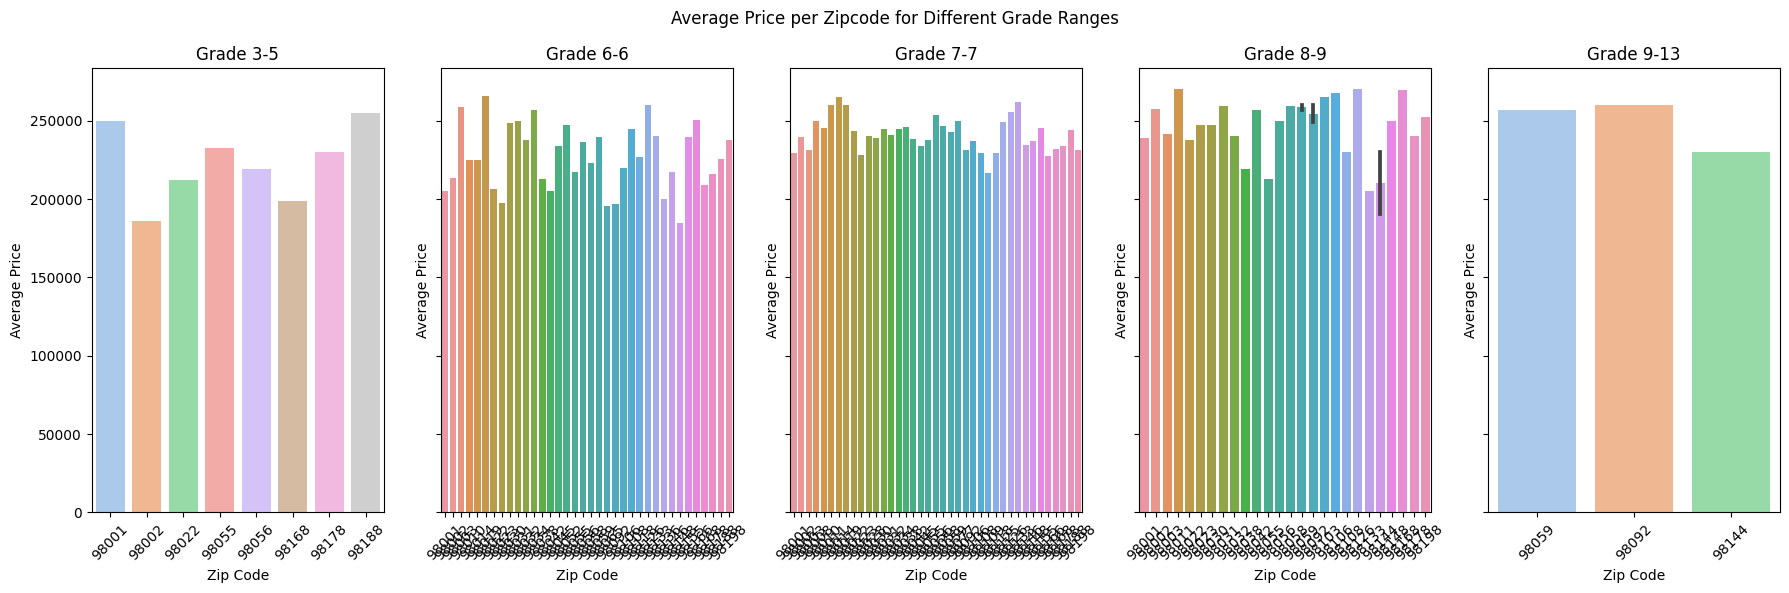

In [82]:
sns.set_palette("pastel")

# Calculate average price per zipcode and grade
avg_price_by_zip_grade = filtered_houses.groupby(['zipcode', 'grade'])['price'].mean().reset_index()

# Create subplots for different grade ranges
grade_ranges = [(3, 5), (6,6), (7,7), (8, 9), (9, 13)]  
num_subplots = len(grade_ranges)

fig, axes = plt.subplots(1, num_subplots, figsize=(18, 6), sharey=True)
fig.suptitle("Average Price per Zipcode for Different Grade Ranges")

for i, (min_grade, max_grade) in enumerate(grade_ranges):
    subset_data = avg_price_by_zip_grade[(avg_price_by_zip_grade['grade'] >= min_grade) & (avg_price_by_zip_grade['grade'] <= max_grade)]
    
    ax = axes[i]
    sns.barplot(data=subset_data, x='zipcode', y='price', ax=ax)
    ax.set_title(f"Grade {min_grade}-{max_grade}")
    ax.set_xlabel("Zip Code")
    ax.set_ylabel("Average Price")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()

In [83]:
# Create a scatter plot
scatter_plot = alt.Chart(filtered_houses).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('price:Q', scale=alt.Scale(range=[100, 1000]), title='Price'),
    color=alt.Color('grade:N', scale=alt.Scale(scheme='viridis'), title='Grade'),
    tooltip=[
        alt.Tooltip('price:Q', format='$,.2f'),  # Format price as currency with two decimal places
        alt.Tooltip('bedrooms:O'),
        alt.Tooltip('bathrooms:O'),
        alt.Tooltip('grade:N')
    ]
).properties(
    title='Geographical Distribution of Filtered Houses'
)

# Display the plot
scatter_plot


alt.Chart(...)

In [84]:
# Geographical map using Altair
alt.data_transformers.disable_max_rows()  # To disable data size limit for Altair
alt.data_transformers.enable('json')  # To enable JSON data transformer

# Create a scatter plot on the map
scatter_map = alt.Chart(filtered_houses).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('price:Q', scale=alt.Scale(range=[100, 1000]), title='Price'),
    color=alt.Color('grade:N', scale=alt.Scale(scheme='viridis'), title='Grade'),
    tooltip=[
        alt.Tooltip('price:Q', format='$,.2f'),  # Format price as currency with two decimal places
        alt.Tooltip('bedrooms:O'),
        alt.Tooltip('bathrooms:O'),
        alt.Tooltip('grade:N')
    ]
).properties(
    title='Geographical Distribution of Filtered Houses'
)

# Show the map
scatter_map.save('scatter_map.html')  # Save the map as an HTML file

from IPython.display import IFrame
IFrame(src='scatter_map.html', width=800, height=600)